### A5: Analysis of NASA - Audio from NASA’s Juno Mission: Europa Flyby


In [15]:
import librosa
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt

import librosa
import librosa.display

audio_data = "./5_Juno Mission Europa Flyby.mp3"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)
librosa.load(audio_data, sr=44100)

<class 'numpy.ndarray'> <class 'int'>
(449820,) 22050


(array([-1.6318459e-19, -4.1653254e-19,  1.5244473e-20, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32),
 44100)

In [16]:
import IPython.display as ipd
ipd.Audio(audio_data)

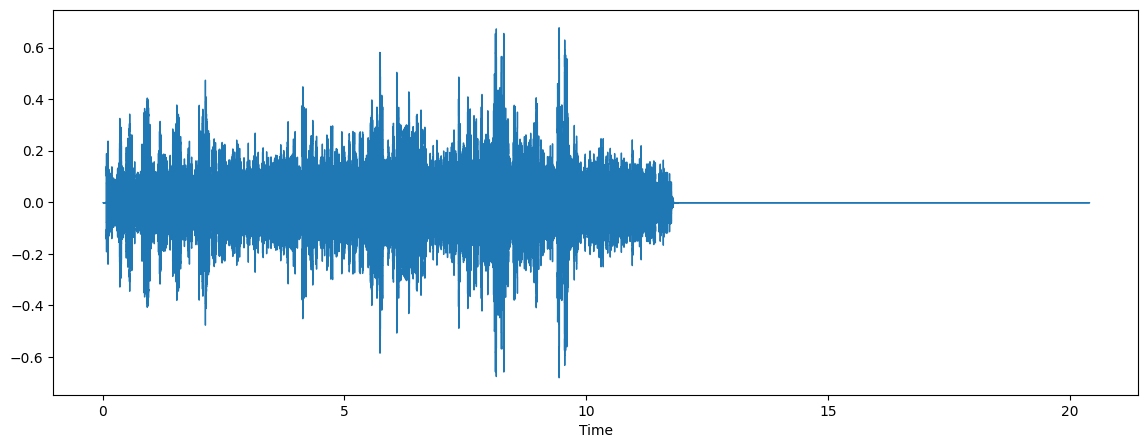

In [17]:
%matplotlib inline
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

In [18]:
# Build a simple chroma filter bank
chromafb = librosa.filters.chroma(sr=22050, n_fft=4096)
# Use quarter-tones instead of semitones
librosa.filters.chroma(sr=22050, n_fft=4096, n_chroma=24)
# Equally weight all octaves
librosa.filters.chroma(sr=22050, n_fft=4096, octwidth=None)

array([[3.06632757e-01, 2.43654341e-01, 1.60742402e-01, ...,
        2.75466492e-20, 2.33491276e-20, 1.97881458e-20],
       [3.00136745e-01, 2.74304509e-01, 2.27255851e-01, ...,
        6.61833761e-13, 5.80291837e-13, 5.08708906e-13],
       [2.90173739e-01, 3.00350249e-01, 2.96240419e-01, ...,
        2.91240070e-07, 2.64146166e-07, 2.39527623e-07],
       ...,
       [3.03631455e-01, 2.60380656e-01, 1.95162937e-01, ...,
        2.12708409e-16, 2.44482217e-16, 2.80916862e-16],
       [3.08412760e-01, 2.28293657e-01, 1.32887244e-01, ...,
        1.18539604e-24, 1.40935927e-24, 1.67509979e-24],
       [3.09425622e-01, 2.10499778e-01, 1.04831174e-01, ...,
        2.09995848e-29, 1.72074678e-29, 1.40981758e-29]], dtype=float32)

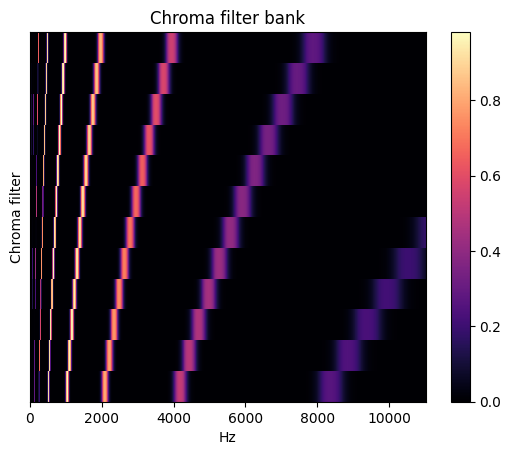

In [19]:
fig, ax = plt.subplots()
img = librosa.display.specshow(chromafb, x_axis='linear', ax=ax)
ax.set(ylabel='Chroma filter', title='Chroma filter bank')
fig.colorbar(img, ax=ax)

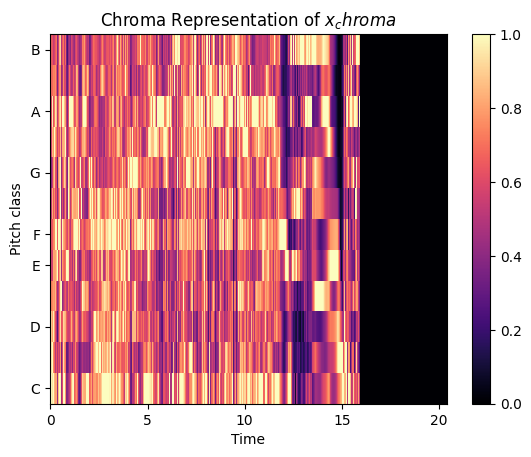

In [20]:
hop_length = 1024

x_chroma = librosa.feature.chroma_cqt(y=x, sr=sr,
                                         hop_length=hop_length)

fig, ax = plt.subplots(nrows=1, sharey=True)
img = librosa.display.specshow(x_chroma, x_axis='time',
                               y_axis='chroma',
                               hop_length=hop_length, ax=ax)
ax.set(title='Chroma Representation of $x_chroma$')
fig.colorbar(img, ax=ax)

In [21]:
librosa.feature.chroma_stft(y=x, sr=sr)
# Use an energy (magnitude) spectrum instead of power spectrogram
S = np.abs(librosa.stft(x))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
# Use a pre-computed power spectrogram with a larger frame
S = np.abs(librosa.stft(x, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.73303056, 0.5726026 , 0.5696301 , ..., 0.        , 0.        ,
        0.        ],
       [0.48192915, 0.59328794, 0.72020125, ..., 0.        , 0.        ,
        0.        ],
       [0.40778702, 0.36054155, 0.5394857 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.57303494, 0.72312546, 0.9484364 , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75778496, 0.43369195, 0.34207663, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

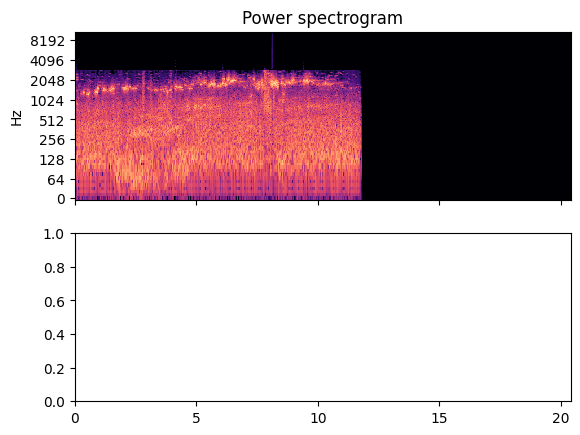

In [23]:
# librosa.onset.onset_strength
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

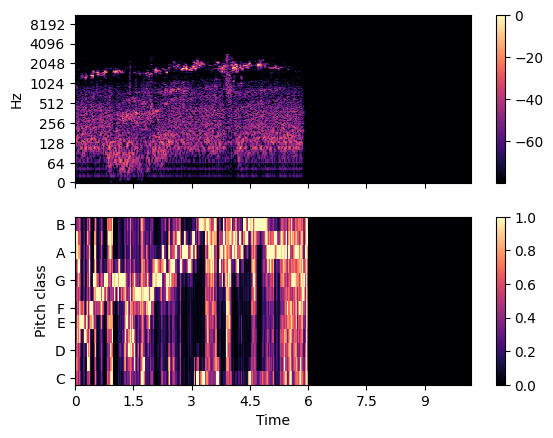

In [22]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

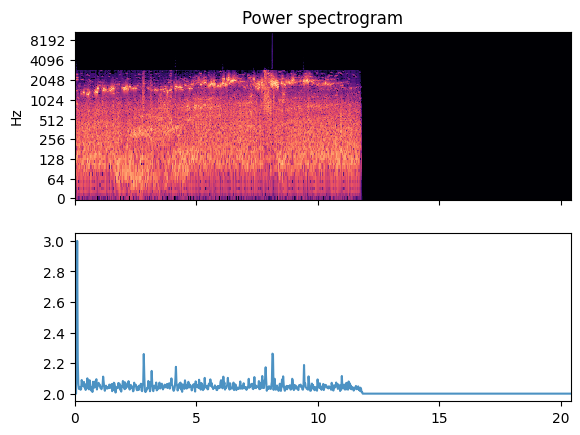

In [24]:
# Construct a standard onset function
# librosa.onset.onset_strength
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
onset_env = librosa.onset.onset_strength(y=x, sr=sr)
ax[1].plot(times, 2 + onset_env / onset_env.max(), alpha=0.8,
           label='Mean (mel)')

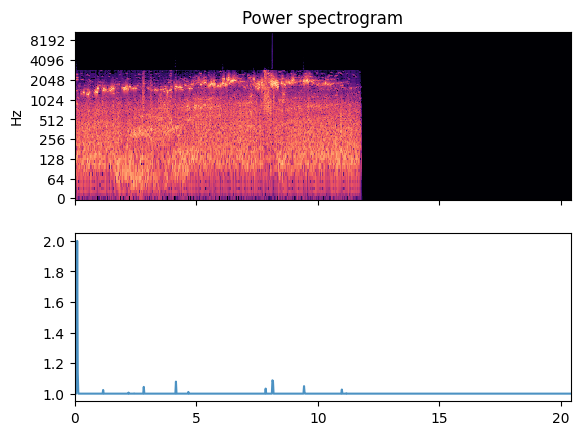

In [25]:
# Median aggregation, and custom mel options
# librosa.onset.onset_strength
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()

onset_env = librosa.onset.onset_strength(y=x, sr=sr,
                                         aggregate=np.median,
                                         fmax=8000, n_mels=256)
ax[1].plot(times, 1 + onset_env / onset_env.max(), alpha=0.8,
           label='Median (custom mel)')

[Text(0, 0.5, 'Normalized strength'), []]

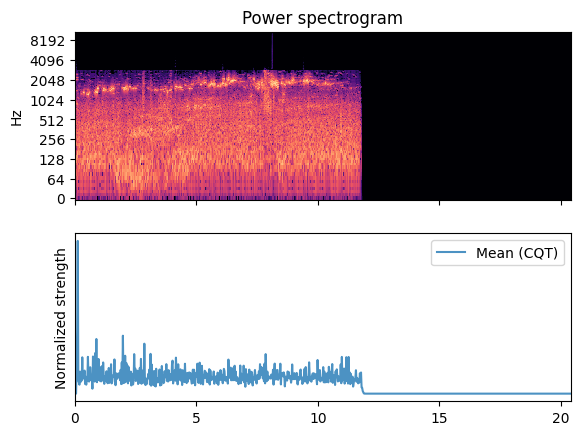

In [26]:
# Constant-Q spectrogram instead of Mel
# librosa.onset.onset_strength
# First, load some audio and plot the spectrogram
D = np.abs(librosa.stft(x))
times = librosa.times_like(D)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()


C = np.abs(librosa.cqt(y=x, sr=sr))
onset_env = librosa.onset.onset_strength(sr=sr, S=librosa.amplitude_to_db(C, ref=np.max))
ax[1].plot(times, onset_env / onset_env.max(), alpha=0.8,
         label='Mean (CQT)')
ax[1].legend()
ax[1].set(ylabel='Normalized strength', yticks=[])

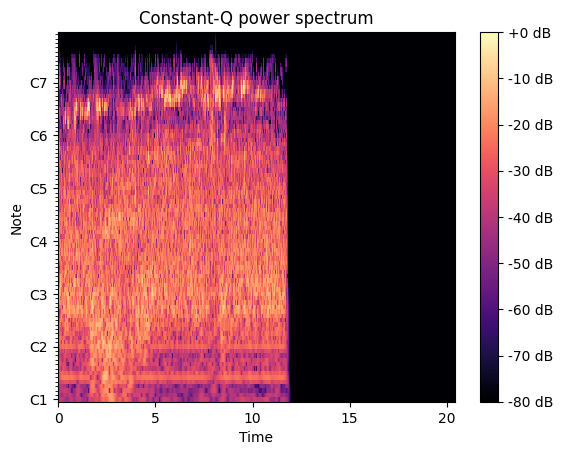

In [27]:
C = np.abs(librosa.cqt(x, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

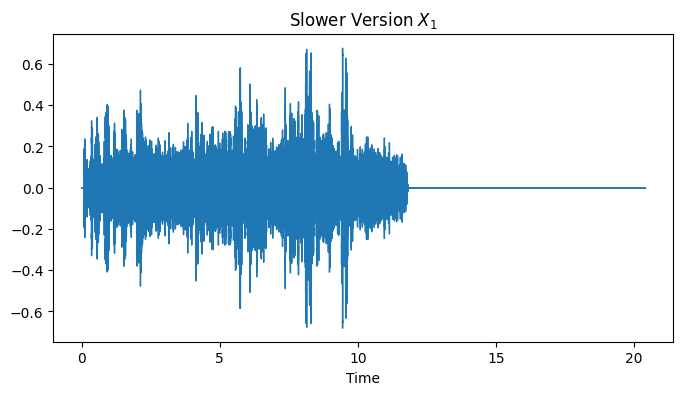

In [29]:
#Alternative Visualization in the Time Domain
fig, ax1 = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(8, 4))

# Plot x_1
librosa.display.waveshow(x, sr=sr, ax=ax1)
ax1.set(title='Slower Version $X_1$')
ax1.label_outer()


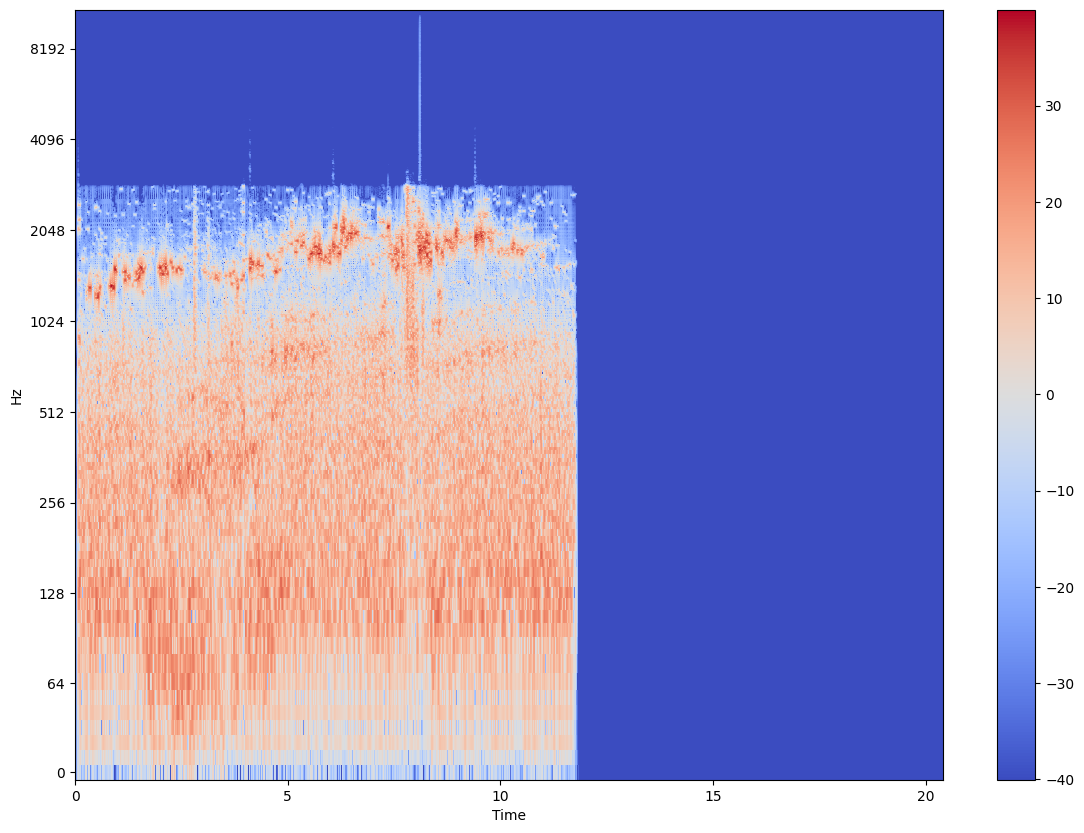

In [30]:
# Spectrogram
import matplotlib.pyplot as plt
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 10))

librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [31]:
X

array([[ 7.0134917e-07+0.00000000e+00j,  6.6921316e-02+0.00000000e+00j,
         5.6890291e-01+0.00000000e+00j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       [ 6.7964430e-07+1.24959428e-07j,  6.0337193e-02+2.98808981e-02j,
        -2.8428978e-01+4.56976205e-01j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       [ 6.2771784e-07+2.22496482e-07j,  4.1677598e-02+5.43674007e-02j,
        -1.5771611e-01-5.01999021e-01j, ...,
         0.0000000e+00-0.00000000e+00j,  0.0000000e+00-0.00000000e+00j,
         0.0000000e+00-0.00000000e+00j],
       ...,
       [-9.3904673e-10+6.35792796e-09j,  3.1764241e-08-4.82619598e-08j,
         3.4836432e-09+4.80595048e-08j, ...,
         0.0000000e+00+0.00000000e+00j,  0.0000000e+00+0.00000000e+00j,
         0.0000000e+00+0.00000000e+00j],
       [-4.9074029e-09+4.20257384e-09j,  3.8381792e-08+5.25297565e-0

In [32]:
Xdb

array([[-40.030384, -23.48871 ,  -4.899237, ..., -40.030384, -40.030384,
        -40.030384],
       [-40.030384, -23.435717,  -5.381295, ..., -40.030384, -40.030384,
        -40.030384],
       [-40.030384, -23.285646,  -5.577126, ..., -40.030384, -40.030384,
        -40.030384],
       ...,
       [-40.030384, -40.030384, -40.030384, ..., -40.030384, -40.030384,
        -40.030384],
       [-40.030384, -40.030384, -40.030384, ..., -40.030384, -40.030384,
        -40.030384],
       [-40.030384, -40.030384, -40.030384, ..., -40.030384, -40.030384,
        -40.030384]], dtype=float32)

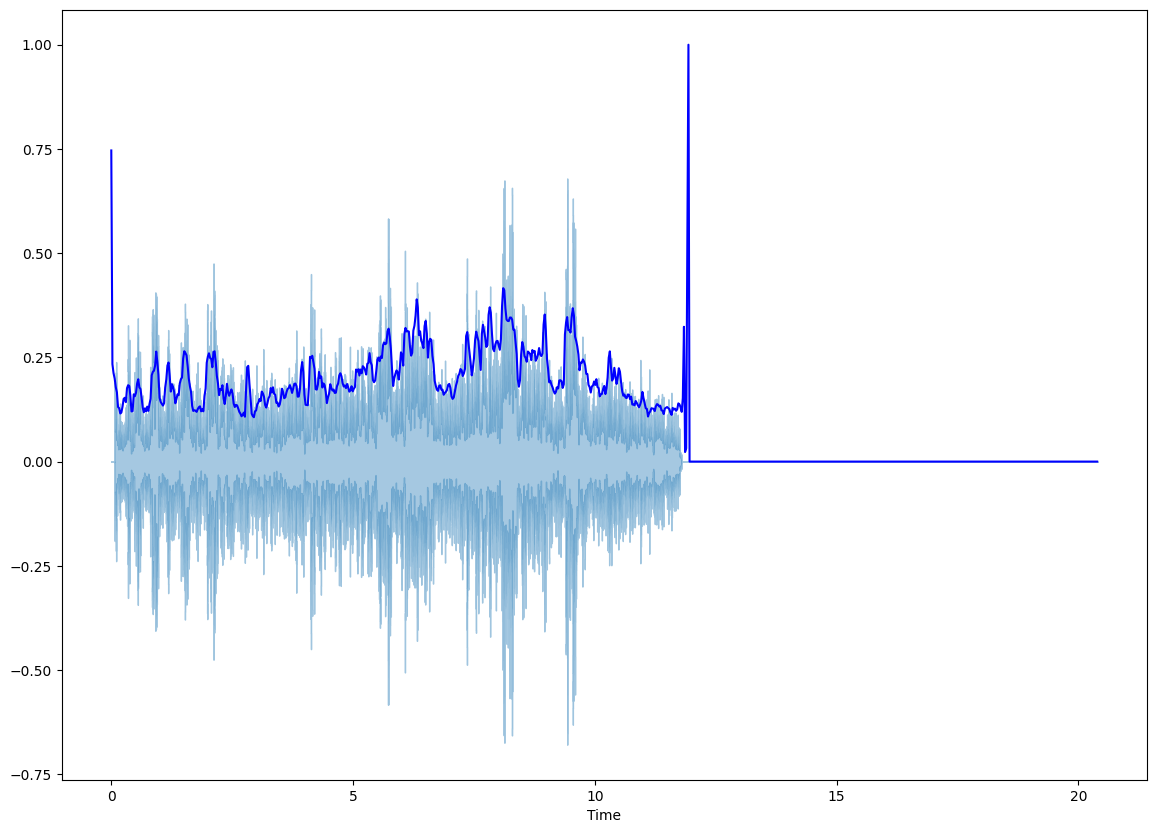

In [33]:
# Spectral Centroid
import sklearn
from sklearn import preprocessing
#https://zhuanlan.zhihu.com/p/144922679
#labelEncoder= preprocessing.LabelEncoder()

spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
spectral_centroids.shape
plt.figure(figsize=(14, 10))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

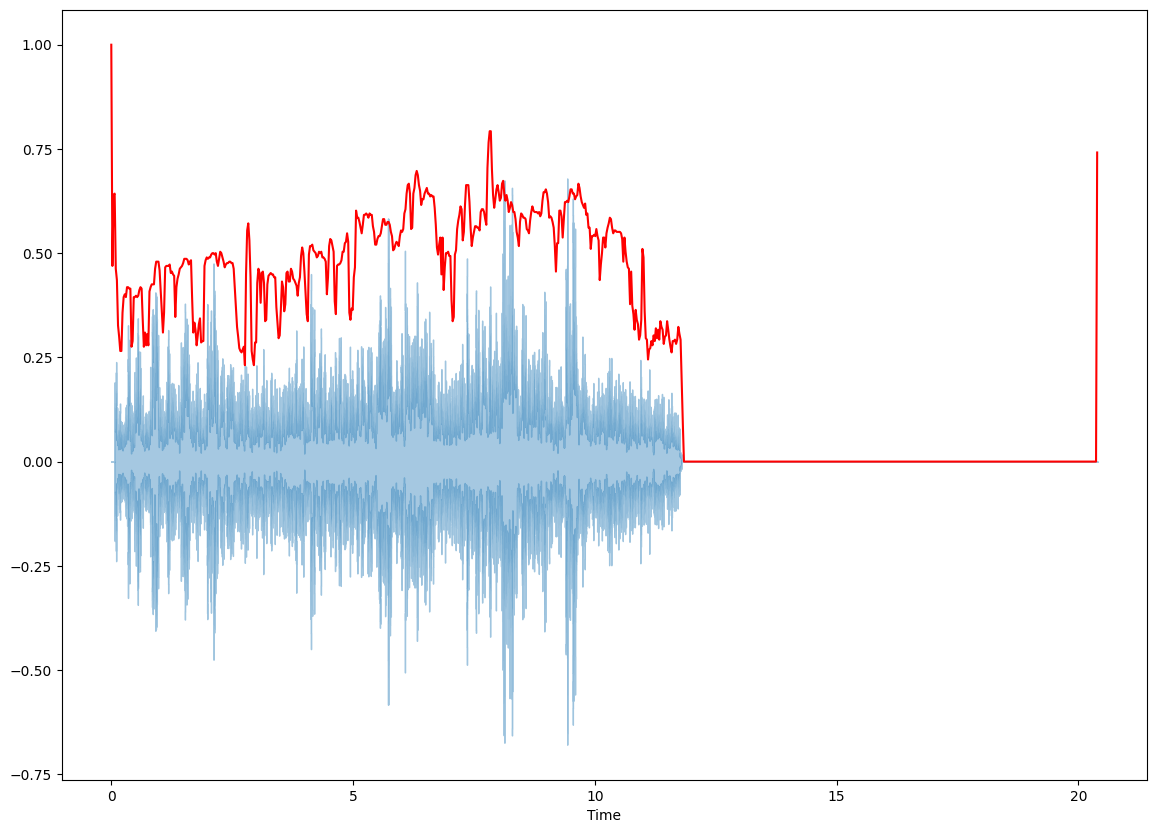

In [34]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=x+0.01, sr=sr)[0]
plt.figure(figsize=(14, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

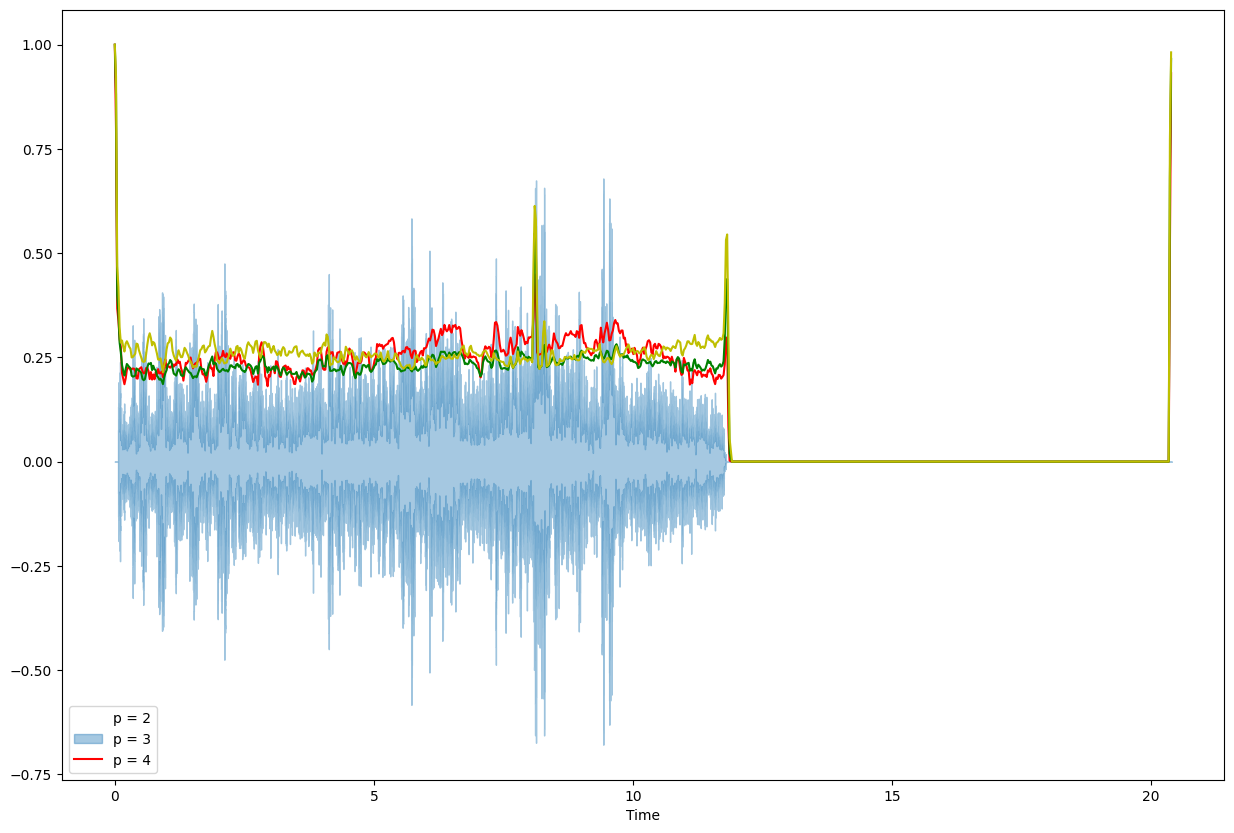

In [35]:
# Spectral Bandwidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 10))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

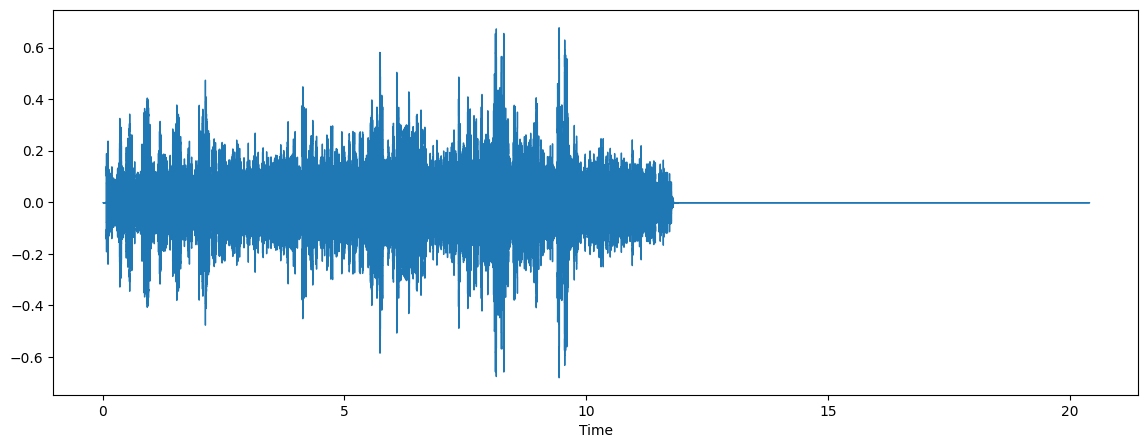

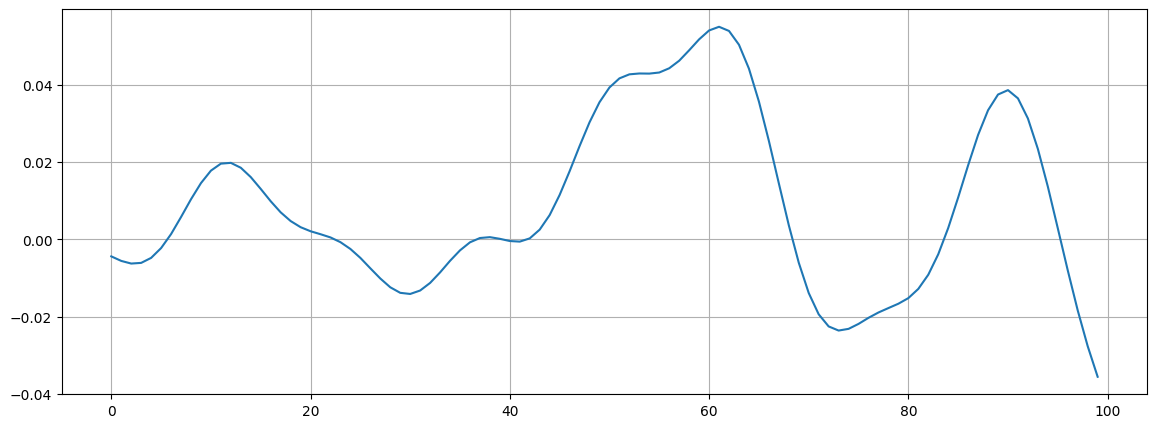

In [36]:
# Zero-Crossing Rate
x, sr = librosa.load(audio_data)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [37]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

8


(20, 879)


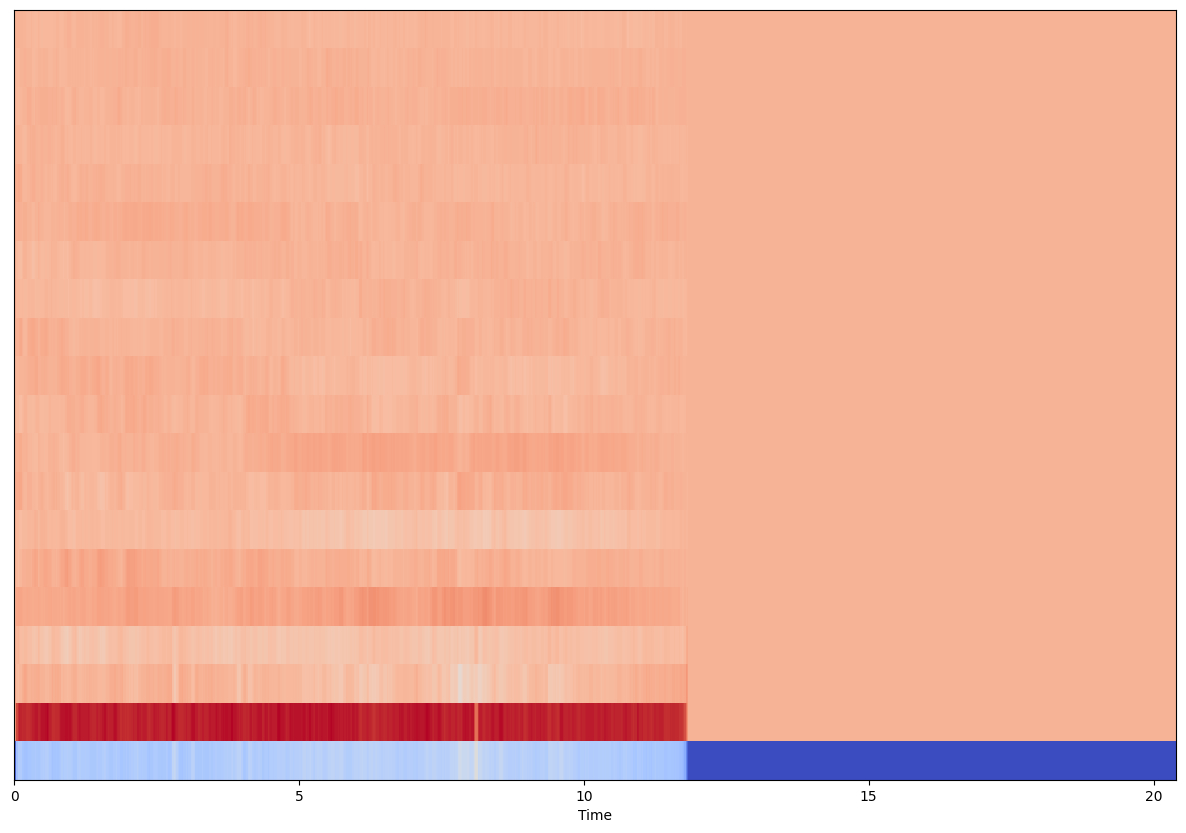

In [38]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
plt.figure(figsize=(15, 10))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')